### Step 1: Import necessary libraries

In [33]:
import pandas as pd
import numpy as np

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # Standardize dataset
from sklearn.model_selection import train_test_split, GridSearchCV # Split dataframe on train and test
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay # Metrics of model
from sklearn import model_selection # For comparing algorithms

# Algorithms for testing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor

### Step 2: Get Dataframe and check if it is valid

In [2]:
data = pd.read_csv('diabetes.csv') # Read DataFrame from csv file
data                               # Print DataFrame

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
data.info() # See information of columns data type and Null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.isnull().sum() # Calculate Null values if they are by columns

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
data.describe().transpose().applymap(lambda x: format(x, '.3f'))
# See information of count min max values and average values of the dataframe

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000
Glucose,768.000,121.656,30.438,44.000,99.750,117.000,140.250,199.000
BloodPressure,768.000,72.387,12.097,24.000,64.000,72.000,80.000,122.000
SkinThickness,768.000,27.335,9.229,7.000,23.000,23.000,32.000,99.000
Insulin,768.000,94.652,105.548,14.000,30.500,31.250,127.250,846.000
BMI,768.000,32.451,6.875,18.200,27.500,32.000,36.600,67.100
DiabetesPedigreeFunction,768.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420
Age,768.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,1.000,1.000


In [6]:
data['Outcome'].value_counts() # Count Diabetic and Not Diabetic people

Outcome
0    500
1    268
Name: count, dtype: int64

In [7]:
data.groupby('Outcome').mean().applymap(lambda x: format(x, '.3f')) 
# Calculate average metrics for diabetic and non diabetic people

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298,109.980,68.184,19.664,68.792,30.304,0.430,31.190
1,4.866,141.257,70.825,22.164,100.336,35.143,0.550,37.067


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

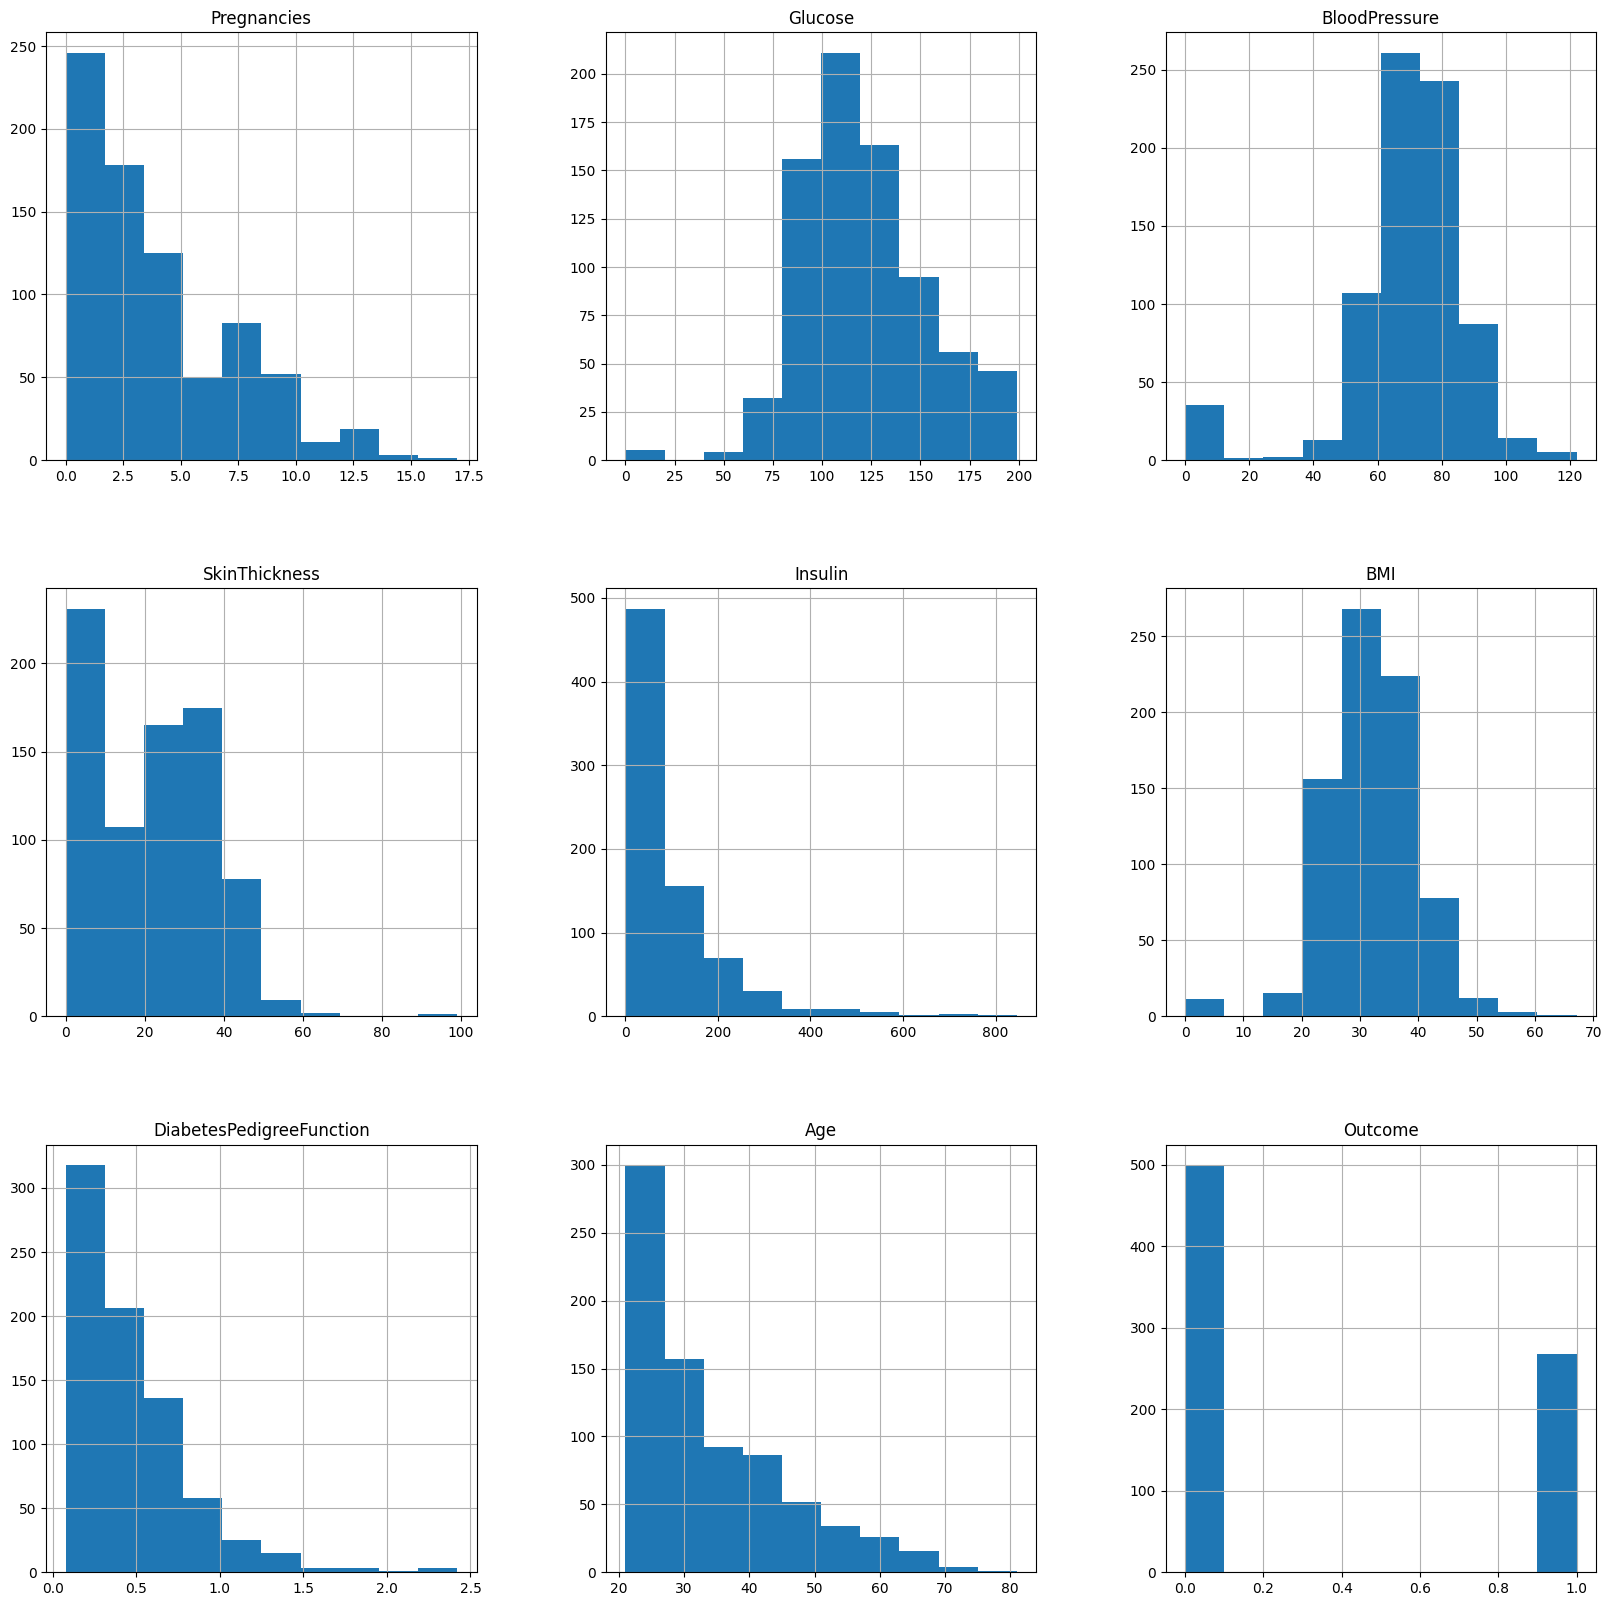

In [8]:
data.hist(figsize = (20, 20))
# On histogram plot we can see that we have lots of data with 0 value
# As BMI == 0 BloodPressure == 0 or Insulin == 0 that can't be so

<Axes: >

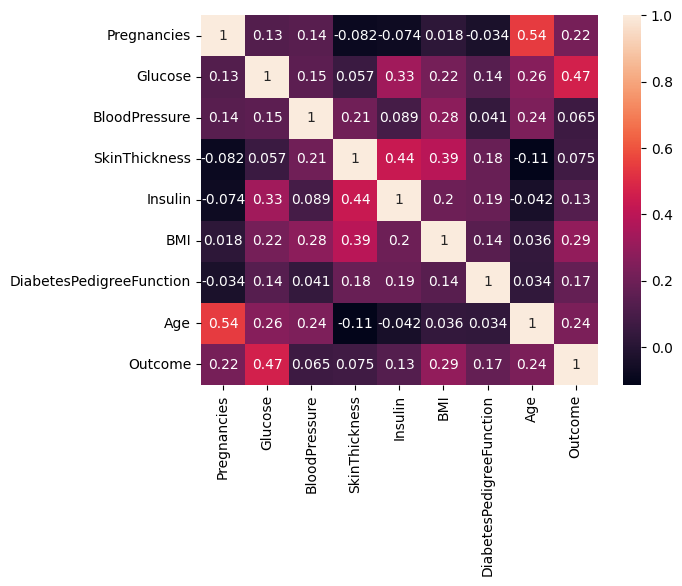

In [9]:
sns.heatmap(data.corr(), annot = True)
# On the plot we can see that diabetes mostly depends on Glucose BMI and Age

In [10]:
# Clean DataFrame from 0 and unreal values and replace with more relevant
medi_BMI = data['BMI'].median()
data['BMI'] = data['BMI'].replace(to_replace=0, value=medi_BMI)

medi_Insulin = data['Insulin'].median()
data['Insulin'] = data['Insulin'].replace(to_replace=0, value=medi_Insulin)

medi_Glucose = data['Glucose'].median()
data['Glucose'] = data['Glucose'].replace(to_replace=0, value=medi_Glucose)

medi_BloodPressure = data['BloodPressure'].median()
data['BloodPressure'] = data['BloodPressure'].replace(to_replace=0, value=medi_BloodPressure)

medi_SkinThickness = data['SkinThickness'].median()
data['SkinThickness'] = data['SkinThickness'].replace(to_replace=0, value=medi_SkinThickness)

data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,30.5,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,23,30.5,30.1,0.349,47,1


### Step 3: Train Test split of DataFrame   

In [19]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42) # Split data on train and test sets

X_train = train_set.drop('Outcome', axis=1) # Define train columns without Outcome column
Y_train = train_set[['Outcome']]            # Assign Outcome column for the train set

X_test = test_set.drop('Outcome', axis=1)   # Define test columns without Outcome column
Y_test = test_set[['Outcome']]              # Assign Outcome column for the test set
Y_train = np.asarray(Y_train).ravel()       # Changed to 1d array
Y_test = np.asarray(Y_test).ravel()         # Changed to 1d array

### Step 4: Data standardization

In [13]:
# Standardization with StandardScaler
standardScaler =  StandardScaler() # Create a StandardScaler instance for standardization
standardScaler.fit(X_train) # Compute the mean and std to be used for later scaling
X_train_St_Scaled = pd.DataFrame(standardScaler.transform(X_train)) # Perform standardization by centering and scaling
X_test_St_Scaled = pd.DataFrame(standardScaler.transform(X_test))   # Perform standardization by centering and scaling

# Standardization with MinMaxScaler values [0; 1]
minmaxScaler = MinMaxScaler()
minmaxScaler.fit(X_train)
X_train_MinMax_Scaled = pd.DataFrame(minmaxScaler.transform(X_train))
X_test_MinMax_Scaled = pd.DataFrame(minmaxScaler.transform(X_test))

# Standardization with RobustScaler takes data from 25% - 75%
robustScaler = RobustScaler()
robustScaler.fit(X_train)
X_train_Rb_Scaled = pd.DataFrame(robustScaler.transform(X_train))
X_test_Rb_Scaled = pd.DataFrame(robustScaler.transform(X_test))

### Step 5: Train and compare Algorithms

In [14]:
# Prepare an array with all the algorithms
models = []
#models.append(('LR', LinearRegression()))
models.append(('LOGR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))
models.append(('LSVC', LinearSVC(dual=False)))
models.append(('RFC', RandomForestClassifier()))
models.append(('DTR', DecisionTreeRegressor()))

# Prepare an array with all the standards
standards = []
standards.append(('Standard Scaling', X_train_St_Scaled))
standards.append(('MinMax Scaling', X_train_MinMax_Scaled))
standards.append(('Robust Scaling', X_train_Rb_Scaled))

In [15]:
# Prepare configuration to run the tests
seed = len(models)
results = []
names = []

In [71]:
# Every algorithm is tested and results are collected and printed
for std_name, standard in standards:
    print('\n',std_name)
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
        if (name == 'LR'):
            scoring = 'r2'
        else:
            scoring = 'accuracy'

        cv_results = model_selection.cross_val_score(model, standard, Y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)


 Standard Scaling
LOGR: 0.760709 (0.040446)
KNN: 0.749313 (0.029864)
NB: 0.742570 (0.049322)
SVC: 0.754019 (0.026138)
LSVC: 0.759096 (0.040734)
RFC: 0.773612 (0.040780)
DTR: 0.684215 (0.032537)

 MinMax Scaling
LOGR: 0.747594 (0.041771)
KNN: 0.724907 (0.040235)
NB: 0.742570 (0.049322)
SVC: 0.750820 (0.036472)
LSVC: 0.760682 (0.034250)
RFC: 0.775225 (0.047799)
DTR: 0.690719 (0.044871)

 Robust Scaling
LOGR: 0.757456 (0.046150)
KNN: 0.741010 (0.029584)
NB: 0.742570 (0.049322)
SVC: 0.757218 (0.032121)
LSVC: 0.759096 (0.040734)
RFC: 0.762242 (0.040594)
DTR: 0.693998 (0.038943)


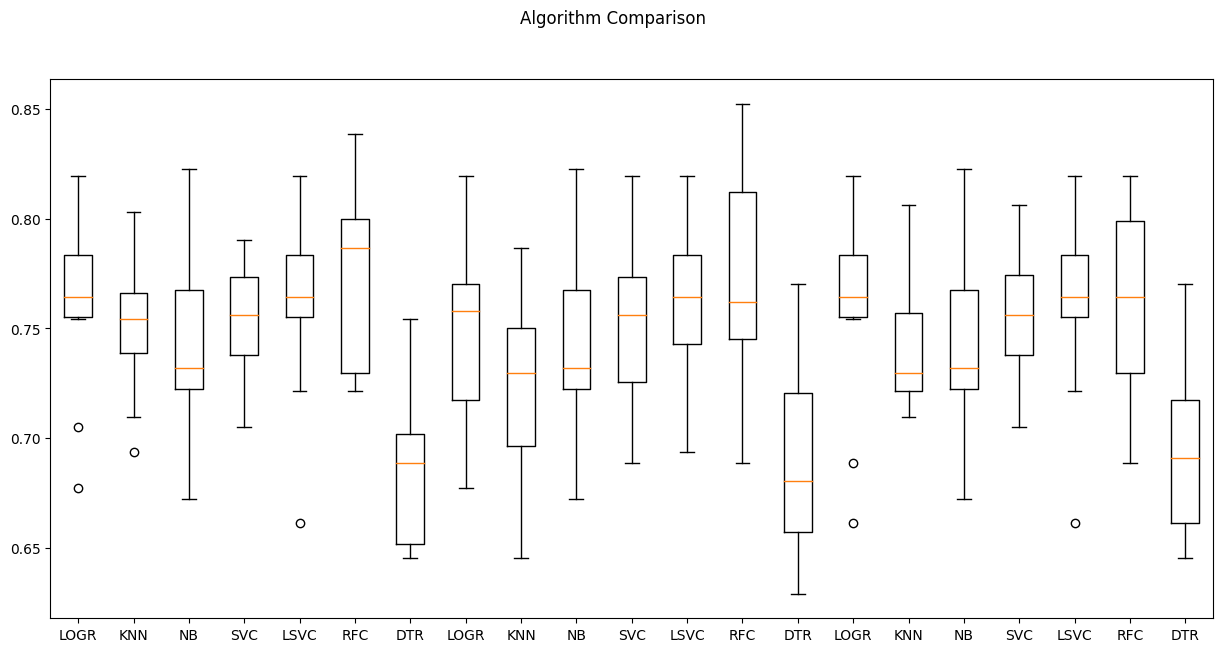

In [91]:
# Create box plot to compare the result
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Step 6: Find the best parameters for SVC and RandomForest Classifier

In [23]:
# Define a dictionary of parameters for the Support Vector Classifier (SVC
param_grid = {
    'C': [1.0, 10.0, 50.0],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'shrinking': [True, False],
    'gamma': ['auto', 1, 0.1],
    'coef0': [0.0, 0.1, 0.5]
}

# Create an instance of the Support Vector Classifier (SVC)
model_svc = SVC()

# Perform grid search using cross-validation to find the best parameters
grid_search_SVC = GridSearchCV(model_svc, param_grid, cv=10, scoring='accuracy')
grid_search_SVC.fit(X_train_St_Scaled, Y_train) # Fit the grid search to the scaled training data and target labels

grid_search_SVC.best_score_

0.7621628767847699

In [232]:
# Apply the parameters to the model and train it
svc = grid_search_SVC.best_estimator_

X_full_ST = pd.DataFrame(np.append(X_train_St_Scaled, X_test_St_Scaled, axis=0))
Y_full = np.append(Y_train, Y_test, axis=0)

svc.fit(X_full_ST, Y_full)

# Create an instance of the RandomForestClassifier and train it
rf_classifier = RandomForestClassifier(min_samples_split=10, min_samples_leaf=4, random_state=42)

X_full_MinMax = pd.DataFrame(np.append(X_train_MinMax_Scaled, X_test_MinMax_Scaled, axis=0))

rf_classifier.fit(X_full_MinMax, Y_full)

RandomForestClassifier(min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

[[93  6]
 [16 39]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89        99
           1       0.87      0.71      0.78        55

    accuracy                           0.86       154
   macro avg       0.86      0.82      0.84       154
weighted avg       0.86      0.86      0.85       154



Text(0.5, 1.0, 'SVC Confusion Matrix')

<Figure size 800x600 with 0 Axes>

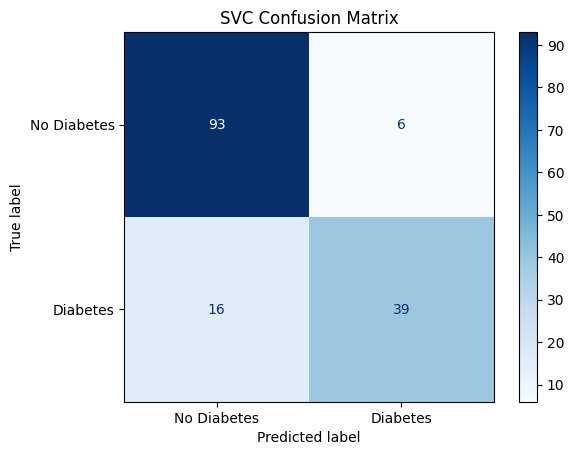

In [233]:
# Make Confusion Matrix to see the train and test results
check_SVC_prediction = svc.predict(X_test_St_Scaled)
print(confusion_matrix(Y_test, check_SVC_prediction))
print(classification_report(Y_test, check_SVC_prediction))

plt.figure(figsize=(8,6))
ConfusionMatrixDisplay.from_estimator(svc, X_test_St_Scaled, Y_test, display_labels=["No Diabetes", "Diabetes"], cmap=plt.cm.Blues)
plt.title("SVC Confusion Matrix")

[[93  6]
 [ 8 47]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        99
           1       0.89      0.85      0.87        55

    accuracy                           0.91       154
   macro avg       0.90      0.90      0.90       154
weighted avg       0.91      0.91      0.91       154



Text(0.5, 1.0, 'RF Confusion Matrix')

<Figure size 800x600 with 0 Axes>

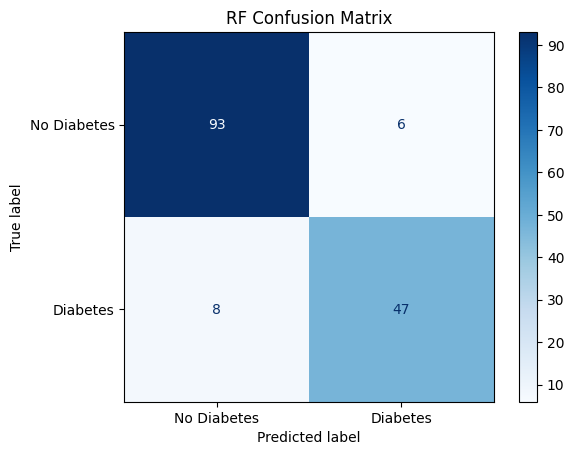

In [234]:
check_RF_prediction = rf_classifier.predict(X_test_MinMax_Scaled)
print(confusion_matrix(Y_test, check_RF_prediction))
print(classification_report(Y_test, check_RF_prediction))

plt.figure(figsize=(8,6))
ConfusionMatrixDisplay.from_estimator(rf_classifier, X_test_MinMax_Scaled, Y_test, display_labels=["No Diabetes", "Diabetes"], cmap=plt.cm.Blues)
plt.title("RF Confusion Matrix")

<Axes: >

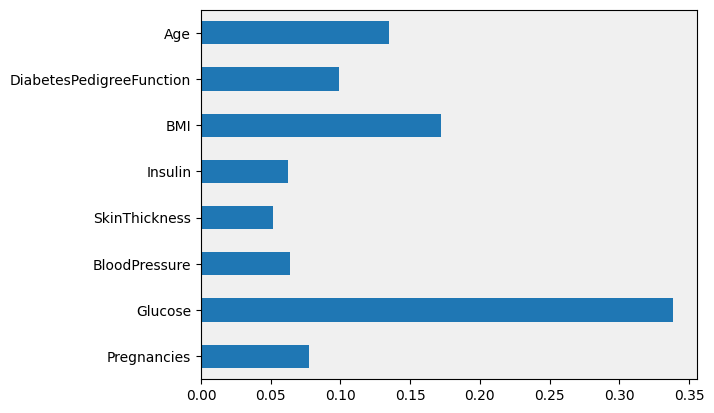

In [267]:
# Plotting Features importance
rf_classifier.feature_importances_
pd.Series(rf_classifier.feature_importances_, index=X_train.columns).plot(kind='barh')

### Step 7: Make Prediction

In [212]:
# Pass new DataFrame to predict diabetic status
new_df = pd.DataFrame([[2,99,52,15,94,24.6,0.637,21]])
# Make standardization data as above made
new_df_St_scaled = standardScaler.transform(new_df)
new_df_MinMax_scaled = minmaxScaler.transform(new_df)
new_df_Rb_scaled = robustScaler.transform(new_df)

# Make predictions using the trained models
# Just to see the result of different standardizations
prediction_SVC_St = svc.predict(new_df_St_scaled)
prediction_SVC_MinMax = svc.predict(new_df_MinMax_scaled)
prediction_SVC_Rb = svc.predict(new_df_Rb_scaled)

predictions_RF_MinMax = rf_classifier.predict(new_df_MinMax_scaled)

# 3,158,64,13,387,31.2,0.295,24 -> not diabetic
# 2,90,70,17,0,27.3,0.085,22    -> not diabetic

In [213]:
predictions = []
predictions.append(prediction_SVC_St)
predictions.append(prediction_SVC_MinMax)
predictions.append(prediction_SVC_Rb)
predictions.append(predictions_RF_MinMax)

for prediction in predictions:
    if prediction == 0:
        print('The person is not diabetic 🎉🎉🎉')
    else:
        print('The person is diabetic')

The person is not diabetic 🎉🎉🎉
The person is not diabetic 🎉🎉🎉
The person is not diabetic 🎉🎉🎉
The person is not diabetic 🎉🎉🎉
